In [1]:
from run_any_data import *

## Loading the data files

#### NOTE: to use the fitting function you need to provide the uncertainty for both x- and y-data (e.g. energy and flux).  For the uncertainty you can use for example 10% of the x and y data.
<br> provide the path to the file. The file can be in either txt or csv format. If the data is in xlsx format use pd.read_excel() instead of pd.read_csv()


In [2]:
#path_to_file = r'C:/Users/Omistaja/Desktop/SRL/2021SRL/messenger/event1.txt'
path =  r'/home/annafed/Documents/Fits_Lengying/Re _Spectral_index_study_error/PSP_LET_A_EnergySpectrum_withUncertainty.txt'
data = pd.read_csv(path) # or pd.read_excel() for xlsx data

path2 =  r'/home/annafed/Documents/Fits_Lengying/Re _Spectral_index_study_error/PSP_HET_A_EnergySpectrum_withUncertainty.txt'
data2 = pd.read_csv(path2) # or pd.read_excel() for xlsx data



#### Choose what to fit. The file can contain all kinds of data and multiple columns etc. Below, you need to choose what you want to fit. Choose x-axis data and y-axis data. 

In [3]:
x_data = data['PSP/LET-A - Energy (MeV)'][:len(data)-2]
y_data = data['flux at 8-hour after shock'][:len(data)-2]
#x_err = data['name of column with x uncertainty data'] 
#y_err = data['name of column with y uncertainty data']

# if the data doesn't contain uncertainty it still needs to be provided for the fitting functions to works
# e.g. use 10% of the data 
x_err = data['PSP/LET-A - Energy: Delta Minus (MeV)'][:len(data)-2]
y_err = data['flux uncertainty at 8-hour after shock'][:len(data)-2]


In [4]:
x_data2 = data2['PSP/HET-A - Energy (MeV)'][:len(data2)-3]
y_data2 = data2['flux at 8-hour after shock'][:len(data2)-3]
#x_err = data['name of column with x uncertainty data'] 
#y_err = data['name of column with y uncertainty data']

# if the data doesn't contain uncertainty it still needs to be provided for the fitting functions to works
# e.g. use 10% of the data 
x_err2 = data2['PSP/LET-A - Energy: Delta Minus (MeV)'][:len(data2)-3]
y_err2 = data2['flux uncertainty at 8-hour after shock'][:len(data2)-3]

#y_err2 = data2['flux uncertainty at 8-hour before shock']


In [5]:
y_err2

0    0.343878
1    0.220806
2    0.142057
3    0.107892
4    0.078357
5    0.057480
6    0.045816
7    0.033187
8    0.025953
Name: flux uncertainty at 8-hour after shock, dtype: float64

## Saving data 
#### You can choose to save the plot (savefig), the ODR run as a pickle file (save_pickle) and save all the variables from the fitting procedure (save_fit_variables) by setting the options below to True

In [6]:
savefig = False # save the fit
save_pickle = False # save a pickle file of the odr run
save_fit_variables = False # save the variables from the fit

In [7]:
data_for_the_fit = pd.DataFrame()
data_for_the_fit['x'] = x_data
data_for_the_fit['y'] = y_data
data_for_the_fit['x error'] = x_err
data_for_the_fit['y error'] = y_err

In [8]:
data_for_the_fit2 = pd.DataFrame()
data_for_the_fit2['x'] = x_data2
data_for_the_fit2['y'] = y_data2
data_for_the_fit2['x error'] = x_err2
data_for_the_fit2['y error'] = y_err2

In [9]:
data_list = [data_for_the_fit, data_for_the_fit2]


## INPUTS FOR THE FIT

### which_fit options: 
<br>'single' will force a single pl fit to the data
<br> 'broken' will force a broken pl fit to the data but ONLY if the break point is within the energy range otherwise a sigle pl fit will be produced instead
<br> 'best_sb' will choose automatically the best fit type between single and broken by comparing the redchis of the fits
<br> 'cut' will produce a single pl fit with an exponential cutoff point. If the cutoff point is outside of the energy range a broken or single pl will be fit instead
<br> 'broken_cut' will produce a broken pl fit with an exponential cutoff point. If the cutoff point is outside of the energy range a broken or single pl will be fit instead
<br> 'best_cb' will choose the better option between a broken pl and a single+cutoff. If the break and cutoff points are outside of the energy range a single pl will be fit instead.
<br>'triple' will try to fit a triple pl. If not possible, will try to fit the next best option.
<br> 'best' will choose automatically the best fit type by comparing the redchis of the fits


In [10]:
which_fit = 'best' 

## Guess values and energy range
#### NOTE: e_min, e_max, break_guess and cut_guess should bein MeV. e_min and e_max can also be None. In this case the MAKE_THE_FIT function will automaically choose the values. (energy on x-axis)

<br>Random and iterations
<br>if use_random = False the fit will only be made once with the guess values
<br> if use_random = True the fitting function will first create a list of reasonable values for each of the fitting parameters then randomly select values from the lists and compare the redchis of each fit to find the best one
<br> iterations = number of times the fit is retried to find the best one

In [14]:
e_min =  None# in MeV 
e_max = 8 # in MeV

g1_guess = -1.9 # gamma 1 -> spectral index before the break (or single pl)
g2_guess = -2.5 # gamma 2 -> spectral index after the break (for broken pl)
g3_guess = -4.5 # gamma 3 -> spectral index after the second break (for triple pl)
c1_guess = 1e3 # peak flux
alpha_guess = 10# sharpness of the first break
beta_guess = 100 #sharpness of the second break
break_guess_low = 10#in MeV
break_guess_high = 33
cut_guess = 33 #in MeV

#legend_details = False
which_fit = 'single'
use_random = True 
iterations = 110

In [15]:
#plot_title = 'PSP spectrum - 8-hours after shock - fit from 12 MeV'
plot_title = 'PSP spectrum - 8-hours after shock - fit until 8 MeV'
#plot_title = 'PSP spectrum - 8-hours after shock'
x_label = 'Energy (MeV)'
y_label = 'Flux\n/(s cm² sr MeV)'
legend_title = '' 

/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:202: RuntimeWarning: invalid value encountered in power
  return c1*x**gamma1
/home/annafed/Documents/GitHub/SolOEPD-Plot-n-Fit-SEE/my_power_law_fits_odr.py:202: RuntimeWarning: overflow encountered in power
  return c1*x**gamma1


single
            x           y   x error   y error
0    2.181017  688.880900  0.197399  9.411283
1    2.593681  577.028300  0.234748  7.894243
2    3.084424  387.651600  0.279164  5.928281
3    3.668019  283.262600  0.331984  4.652474
4    4.362035  196.889000  0.394798  3.555254
5    5.187363  138.334600  0.469496  2.733048
6    6.168849   96.583860  0.558329  2.094242
7    7.336039   57.785720  0.663968  1.485682
8    8.724070   39.359790  0.789596  1.143621
9   10.374730   27.703710  0.938993  0.966232
10  12.337700   18.080320  1.116657  0.718758
11  14.672080   11.134610  1.327937  0.517476
12  17.448140    5.986617  1.579191  0.347970
13  20.749450    3.113239  1.877986  0.230140
14  24.675390    1.978753  2.233314  0.171961
15  29.344150    1.003875  2.655873  0.143154
16  12.337700   17.802120  1.116657  0.343878
17  14.672080    8.408027  1.327937  0.220806
18  17.448140    3.827640  1.579191  0.142057
19  20.749450    2.356386  1.877986  0.107892
20  24.675390    1.294670  

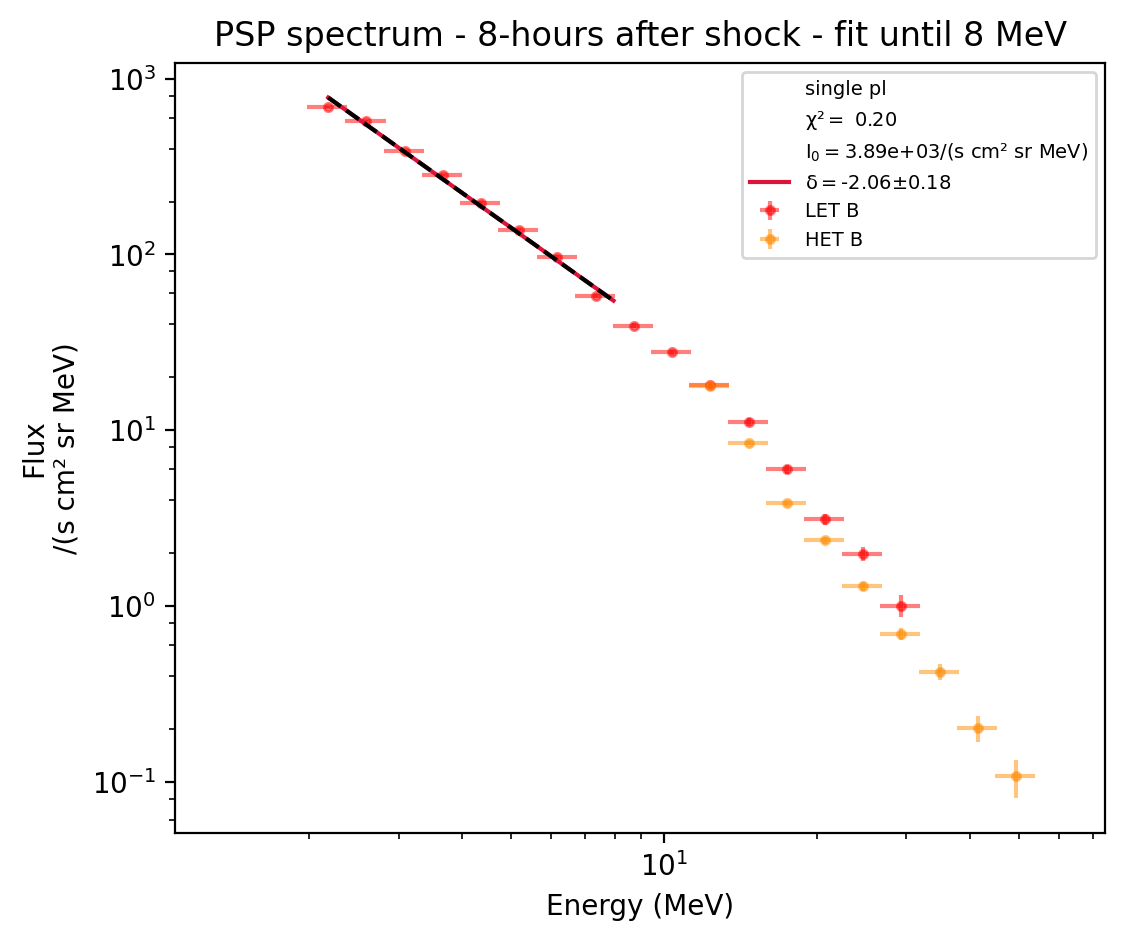

In [16]:
run_all(path, data_list, savefig = True, plot_title = plot_title, x_label = x_label, y_label = y_label, legend_title = legend_title, data_label_for_legend = ['LET B', 'HET B'], which_fit = which_fit, e_min = e_min, e_max = e_max, g1_guess = g1_guess, g2_guess = g2_guess, g3_guess = g3_guess, c1_guess = c1_guess, alpha_guess = alpha_guess, beta_guess = beta_guess, break_guess_low = break_guess_low, break_guess_high = break_guess_high, cut_guess = cut_guess, use_random = use_random, iterations = iterations , legend_details = True)  

